# Quantium Virtual Internship

## The task
We need to analyse the data to understand current purchasing trends and behaviours. The client is particularly interested in customer segments and their chip purchasing behaviour. Consider what metrics would help describe the customers’ purchasing behaviour.  

# EDA
To get started, download the resource csv data files below and begin performing high level data checks such as:
Creating and interpreting high level summaries of the data
Finding outliers and removing these (if applicable)
Checking data formats and correcting (if applicable)

You will also want to derive extra features such as pack size and brand name from the data.  Remember our end goal is to form a strategy based on the findings to provide a clear recommendation to Julia the Category Manager so make sure your insights can have a commercial application.

Examine transaction data – look for inconsistencies, missing data across the data set, outliers, correctly identified category items, numeric data across all tables. 

Examine customer data – check for similar issues in the customer data, look for nulls and when you are happy merge the transaction and customer data together so it’s ready for the analysis ensuring you save your files along the way.

Data analysis and customer segments – in your analysis make sure you define the metrics – look at total sales, drivers of sales, where the highest sales are coming from etc. Explore the data, create charts and graphs as well as noting any interesting trends and/or insights you find. These will all form part of our report to Julia. 

Deep dive into customer segments – define your recommendation from your insights, determine which segments we should be targeting, if packet sizes are relative and form an overall conclusion based on your analysis. 

In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette('magma')

In [46]:
df = pd.read_excel('data/QVI_transaction_data.xlsx')
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [47]:
df.shape

(264836, 8)

In [48]:
# function to get the weight of pack
def get_weight(name):
    if name.startswith('Kettle 135g'):
        return name[7:10].strip()
    else:
        return name[-4:-1].strip()

In [49]:
df['weight'] = df['PROD_NAME'].apply(lambda x: get_weight(x))

In [50]:
# change weight data type to integer
df['weight'] = df['weight'].astype(int)

In [51]:
# get brand name
df['brand'] = df['PROD_NAME'].apply(lambda x: x.split()[0])

In [52]:
# check brand names
df['brand'].value_counts()

Kettle        41288
Smiths        28860
Pringles      25102
Doritos       24962
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Old            9324
Tyrrells       6442
Grain          6272
Natural        6050
Red            5885
Cheezels       4603
CCs            4551
Woolworths     4437
Dorito         3185
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: brand, dtype: int64

In [65]:
# rename brand names
df.loc[df['PROD_NAME'].str.startswith('Red'), ['brand']] = 'Red Rock Deli'
df.loc[df['PROD_NAME'].str.startswith('Old'), ['brand']] = 'Old El Paso'
df.loc[df['PROD_NAME'].str.startswith('Dorito'), ['brand']] = 'Doritos'
df.loc[df['PROD_NAME'].str.startswith('Natural'), ['brand']] = 'Natural Chip Co'
df.loc[df['PROD_NAME'].str.startswith('NCC'), ['brand']] = 'Natural Chip Co'
df.loc[df['PROD_NAME'].str.startswith('Infzns'), ['brand']] = 'Infuzions'
df.loc[df['PROD_NAME'].str.startswith('Snbts'), ['brand']] = 'Sunbites'
df.loc[df['PROD_NAME'].str.startswith('GrnWves'), ['brand']] = 'Sunbites'
df.loc[df['PROD_NAME'].str.startswith('Burger'), ['brand']] = 'Smiths'
df.loc[df['PROD_NAME'].str.startswith('Smith'), ['brand']] = 'Smiths'
df.loc[df['PROD_NAME'].str.startswith('French'), ['brand']] = 'French Fries'

#### Wrong categories

In [55]:
# dip in Smiths brand is just a name for chip flavor, not wrongly categorised
df[(df['PROD_NAME'].str.contains('Dip')) & (df['brand']=='Smiths')]['PROD_NAME'].value_counts()

Smiths Crinkle Cut  French OnionDip 150g    1438
Name: PROD_NAME, dtype: int64

In [56]:
# Old El Paso Salsa Dips are wrongly categories under chips
df[df['PROD_NAME'].str.startswith('Old')]['PROD_NAME'].value_counts()

Old El Paso Salsa   Dip Chnky Tom Ht300g    3125
Old El Paso Salsa   Dip Tomato Med 300g     3114
Old El Paso Salsa   Dip Tomato Mild 300g    3085
Name: PROD_NAME, dtype: int64

In [57]:
# Woolworth salsas wrongly categorised
df[(df['brand']=='Woolworths') & (df['PROD_NAME'].str.contains('Salsa'))]['PROD_NAME'].value_counts()

Woolworths Mild     Salsa 300g    1491
Woolworths Medium   Salsa 300g    1430
Name: PROD_NAME, dtype: int64

In [62]:
# Doritos salsas wrongly categorised
df[(df['brand']=='Doritos') & (df['PROD_NAME'].str.contains('Salsa'))]['PROD_NAME'].value_counts()

Series([], Name: PROD_NAME, dtype: int64)

In [59]:
# identify all Old El Paso dip product rows
old_el = df[df['PROD_NAME'].str.startswith('Old')].index
# identify Doritos salsas
doritos_salsa = df[(df['brand']=='Doritos') & (df['PROD_NAME'].str.contains('Salsa'))].index
# identify Woolworth salsas
woolworth_salsa = df[(df['brand']=='Woolworths') & (df['PROD_NAME'].str.contains('Salsa'))]['PROD_NAME'].index

In [61]:
# remove Old El Paso dips, Doritos salsas and Woolworths salsas
df = df.drop(old_el)
df = df.drop(doritos_salsa)
df = df.drop(woolworth_salsa)

### Visualise

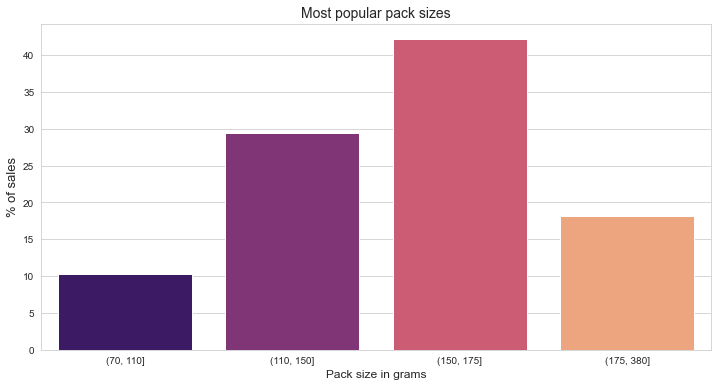

In [256]:
plt.figure(figsize=(12,6))

bins = [70, 110, 150, 175, 380]
q = pd.cut(df['weight'], bins=bins).value_counts(normalize=True).sort_index()*100
y = q.values
x = q.index

sns.barplot(x=x, y=y, palette='magma')

plt.xlabel('Pack size in grams', fontsize=12)
plt.ylabel('% of sales', fontsize=13)
plt.title('Most popular pack sizes', fontsize=14);

In [229]:
brand_counts = df['brand'].value_counts(normalize=True)*100

In [230]:
brand_counts

Kettle             16.537029
Smiths             13.372452
Doritos            10.103737
Pringles           10.054071
Infuzions           5.687908
Thins               5.637441
RRD                 4.763888
WW                  4.133456
Cobs                3.882325
Tostitos            3.793407
Twisties            3.786598
Natural Chip Co     2.991549
Tyrrells            2.580206
Grain               2.512116
Red Rock Deli       2.357111
Cheezels            1.843634
CCs                 1.822806
Sunbites            1.792766
Cheetos             1.172347
Woolworths          0.607202
French Fries        0.567950
Name: brand, dtype: float64

''

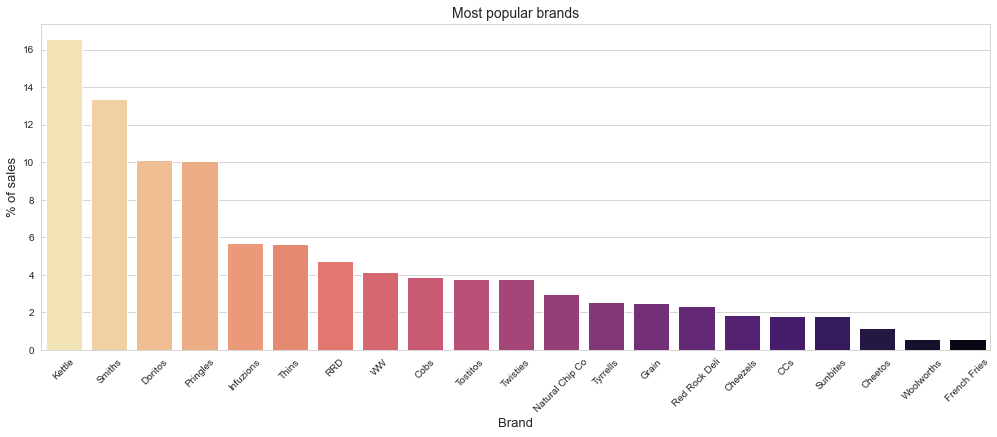

In [258]:
plt.figure(figsize=(17,6))

brand_counts = df['brand'].value_counts(normalize=True)*100
y = brand_counts.values
x = brand_counts.index

sns.barplot(x=x, y=y, palette='magma_r')
plt.xticks(rotation=45)
plt.xlabel('Brand', fontsize=13)
plt.ylabel('% of sales', fontsize=13)
plt.title('Most popular brands', fontsize=14)
;

In [259]:
df.sample(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,weight,brand
166582,43338,208,208023,206238,97,RRD Salt & Vinegar 165g,2,6.0,165,RRD
184456,43316,260,260168,259361,88,Kettle Honey Soy Chicken 175g,2,10.8,175,Kettle
1846,43489,97,97242,97802,93,Doritos Corn Chip Southern Chicken 150g,2,7.8,150,Doritos
256393,43645,241,241020,244678,26,Pringles Sweet&Spcy BBQ 134g,2,7.4,134,Pringles
52995,43423,236,236076,239017,90,Tostitos Smoked Chipotle 175g,2,8.8,175,Tostitos
80370,43559,269,269162,266011,53,RRD Sweet Chilli & Sour Cream 165g,2,6.0,165,RRD
46007,43457,155,155242,156539,25,Pringles SourCream Onion 134g,2,7.4,134,Pringles
918,43483,47,47182,42585,50,Tostitos Lightly Salted 175g,2,8.8,175,Tostitos
228252,43466,269,269185,266163,107,Smiths Crinkle Cut French OnionDip 150g,2,5.2,150,Smiths
122440,43418,70,70233,68812,111,Smiths Chip Thinly Cut Original 175g,2,6.0,175,Smiths


In [345]:
df_items = df[['PROD_NAME', 'TOT_SALES']]
katse = df_items.groupby('PROD_NAME').sum().head(30).sort_values(['TOT_SALES'],ascending=False)

In [357]:
katse

,TOT_SALES
PROD_NAME,
Dorito Corn Chp Supreme 380g,40352.0
Cheezels Cheese 330g,34296.9
Doritos Cheese Supreme 330g,33390.6
Kettle Chilli 175g,31271.4
Doritos Corn Chips Cheese Supreme 170g,27183.2
Doritos Corn Chips Nacho Cheese 170g,26562.8
Doritos Mexicana 170g,26290.0
Doritos Corn Chips Original 170g,26228.4
Kettle 135g Swt Pot Sea Salt,26090.4


''

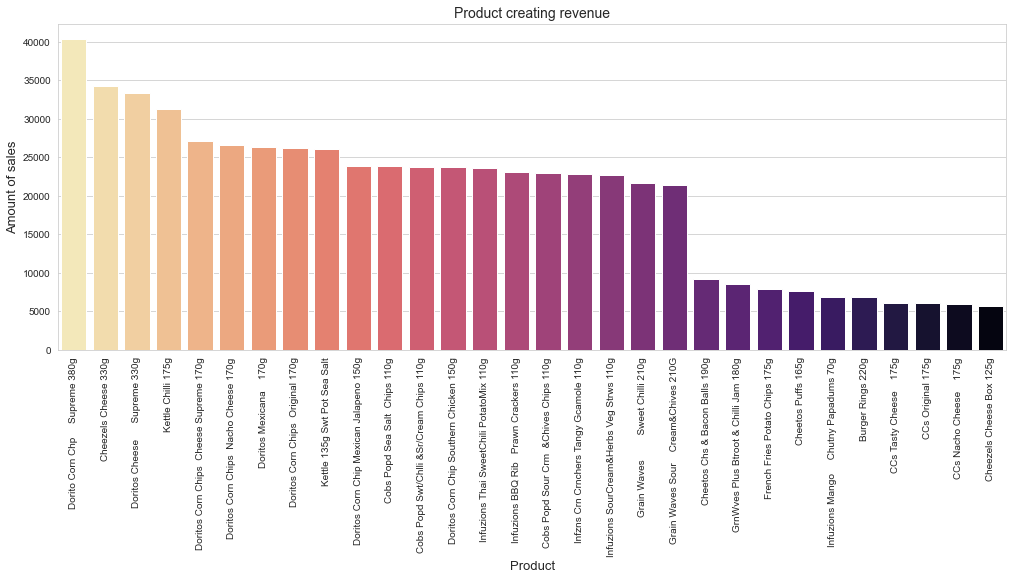

In [405]:
# which product makes the most money?
plt.figure(figsize=(17,6))

df_items = df[['PROD_NAME', 'TOT_SALES']]
df_items_sum = df_items.groupby('PROD_NAME').sum().head(30).sort_values(['TOT_SALES'],ascending=False)

x = df_items_sum.index.to_series()
y = df_items_sum['TOT_SALES']

sns.barplot(x=x, y=y, palette='magma_r')
plt.xticks(rotation=90)
plt.xlabel('Product', fontsize=13)
plt.ylabel('Amount of sales', fontsize=13)
plt.title('Products creating revenue', fontsize=14)
;

''

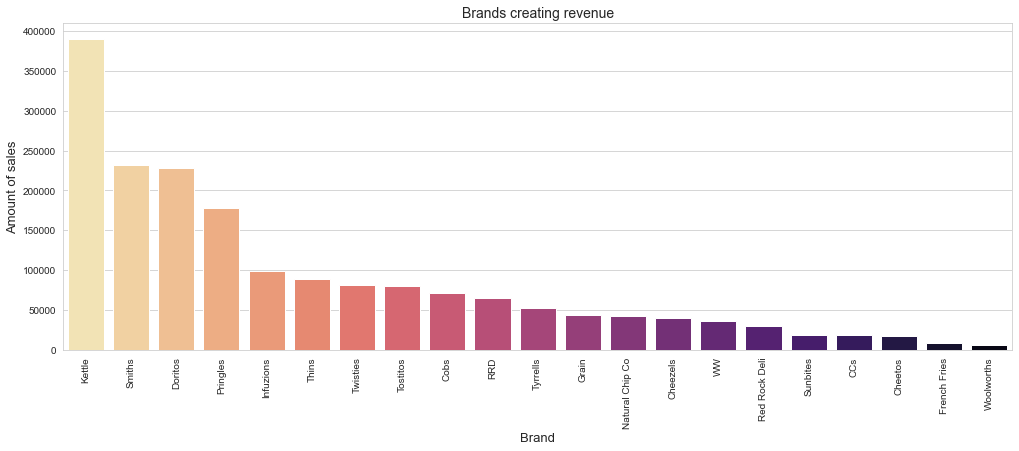

In [406]:
# which product makes the most money?
plt.figure(figsize=(17,6))

df_items = df[['brand', 'TOT_SALES']]
df_items_sum = df_items.groupby('brand').sum().sort_values(['TOT_SALES'],ascending=False)

x = df_items_sum.index.to_series()
y = df_items_sum['TOT_SALES']

sns.barplot(x=x, y=y, palette='magma_r')
plt.xticks(rotation=90)
plt.xlabel('Brand', fontsize=13)
plt.ylabel('Amount of sales', fontsize=13)
plt.title('Brands creating revenue', fontsize=14)
;

## Customer data

In [4]:
df2 = pd.read_csv('data/QVI_purchase_behaviour.csv')
df2.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [5]:
df2.shape

(72637, 3)

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
